In [7]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [8]:
import tensorflow as tf
tf.test.gpu_device_name()

''

In [9]:
#Mounting google drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [10]:
!ls "/content/drive/MyDrive/insurance"

sales_data.csv	testML_.ipynb


In [11]:
#importing necessary libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [12]:
# from google.colab import files

# uploaded = files.upload()

In [13]:
# df = pd.read_csv(io.StringIO(uploaded['sales_data.csv'].decode('utf-8')))
# # df=pd.read_csv("sales_data.csv")
# df.head(20)

In [14]:
file_path = '/content/drive/MyDrive/insurance/sales_data.csv'

df = pd.read_csv(file_path)
df.head(20)

,flag,gender,education,house_val,age,online,marriage,child,occupation,mortgage,house_owner,region,fam_income
0,Y,M,4. Grad,756460,1_Unk,N,NaN,U,Professional,1Low,NaN,Midwest,L
1,N,F,3. Bach,213171,7_>65,N,NaN,U,Professional,1Low,Owner,Northeast,G
2,N,M,2. Some College,111147,2_<=25,Y,NaN,Y,Professional,1Low,Owner,Midwest,J
3,Y,M,2. Some College,354151,2_<=25,Y,Single,U,Sales/Service,1Low,NaN,West,L
4,Y,F,2. Some College,117087,1_Unk,Y,Married,Y,Sales/Service,1Low,NaN,South,H
5,Y,F,3. Bach,248694,6_<=65,Y,Married,N,Professional,2Med,Owner,West,G
6,Y,M,3. Bach,2000000,1_Unk,Y,Married,U,Professional,1Low,NaN,Northeast,C
7,N,F,3. Bach,416925,5_<=55,Y,Married,Y,Professional,1Low,Owner,South,I
8,N,F,1. HS,207676,4_<=45,Y,NaN,Y,Blue Collar,1Low,Renter,West,D
9,Y,M,1. HS,241380,1_Unk,Y,Married,U,Sales/Service,1Low,NaN,Northeast,G


In [15]:
df.columns

Index(['flag', 'gender', 'education', 'house_val', 'age', 'online', 'marriage',
       'child', 'occupation', 'mortgage', 'house_owner', 'region',
       'fam_income'],
      dtype='object')

In [16]:
df.shape

(40000, 13)

In [17]:
df.dtypes

flag           object
gender         object
education      object
house_val       int64
age            object
online         object
marriage       object
child          object
occupation     object
mortgage       object
house_owner    object
region         object
fam_income     object
dtype: object

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   flag         40000 non-null  object
 1   gender       40000 non-null  object
 2   education    39259 non-null  object
 3   house_val    40000 non-null  int64 
 4   age          40000 non-null  object
 5   online       40000 non-null  object
 6   marriage     25973 non-null  object
 7   child        40000 non-null  object
 8   occupation   40000 non-null  object
 9   mortgage     40000 non-null  object
 10  house_owner  36623 non-null  object
 11  region       40000 non-null  object
 12  fam_income   40000 non-null  object
dtypes: int64(1), object(12)
memory usage: 4.0+ MB


In [19]:
df.describe()

,house_val
count,4.000000e+04
mean,3.072138e+05
std,4.222146e+05
min,0.000000e+00
25%,8.065725e+04
50%,2.148720e+05
75%,3.937620e+05
max,9.999999e+06


In [20]:
df.isnull().sum()

flag               0
gender             0
education        741
house_val          0
age                0
online             0
marriage       14027
child              0
occupation         0
mortgage           0
house_owner     3377
region             0
fam_income         0
dtype: int64

In [21]:
df['education'].unique()

array(['4. Grad', '3. Bach', '2. Some College', '1. HS', '0. <HS', nan],
      dtype=object)

In [22]:
df['education'].nunique()

5

In [23]:
df['education'].value_counts()

2. Some College    11400
3. Bach             9267
1. HS               8828
4. Grad             5916
0. <HS              3848
Name: education, dtype: int64

In [24]:
df['child'].unique()

array(['U', 'Y', 'N', '0'], dtype=object)

In [25]:
df['child'].nunique()

4

In [26]:
df['child'].value_counts()

Y    18012
N    13333
U     8528
0      127
Name: child, dtype: int64

In [27]:
df["child"] = df["child"].str.replace("0", "U")

In [28]:
df['child'].unique()

array(['U', 'Y', 'N'], dtype=object)

In [29]:
df['child'].nunique()

3

In [30]:
df['child'].value_counts()

Y    18012
N    13333
U     8655
Name: child, dtype: int64

In [31]:
df.isnull().sum()

flag               0
gender             0
education        741
house_val          0
age                0
online             0
marriage       14027
child              0
occupation         0
mortgage           0
house_owner     3377
region             0
fam_income         0
dtype: int64

There are null values present in education, marriage and house_owner

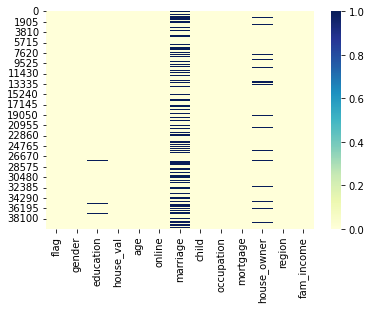

In [32]:
# Visualization for null vlue
sns.heatmap(df.isnull(),cmap="YlGnBu")
plt.show()

In [33]:
df.nunique()

flag               2
gender             3
education          5
house_val      19572
age                7
online             2
marriage           2
child              3
occupation         6
mortgage           3
house_owner        2
region             5
fam_income        13
dtype: int64

In [34]:
for col in df.columns:
    print(col, df[col].unique())

flag ['Y' 'N']
gender ['M' 'F' 'U']
education ['4. Grad' '3. Bach' '2. Some College' '1. HS' '0. <HS' nan]
house_val [756460 213171 111147 ... 120630 603554 213596]
age ['1_Unk' '7_>65' '2_<=25' '6_<=65' '5_<=55' '4_<=45' '3_<=35']
online ['N' 'Y']
marriage [nan 'Single' 'Married']
child ['U' 'Y' 'N']
occupation ['Professional' 'Sales/Service' 'Blue Collar' 'Others' 'Retired' 'Farm']
mortgage ['1Low' '2Med' '3High']
house_owner [nan 'Owner' 'Renter']
region ['Midwest' 'Northeast' 'West' 'South' 'Rest']
fam_income ['L' 'G' 'J' 'H' 'C' 'I' 'D' 'E' 'A' 'F' 'B' 'K' 'U']


### Dataset Description

The marketing department of Imperials ltd has been tracking fourteen different metrics on customers who bought their new life insurance product. The department have been tracking the following metrics of customers; 


•	Flag (yes, no) (target)

•	Gender, 

•	Highest level of Education, 

•	House value,

•	Age,

•	If the purchase was made online,

•	Marital status,

•	If the customer has any children,

•	The occupation of the purchaser,

•	The mortgage bracket of the customer,

•	If the customer is a house owner,

•	The region of the customer,

•	A grading of the family income.


##### Filling the null values

In [35]:
df["education"].fillna(df["education"].mode()[0], inplace=True)
df["marriage"].fillna(df["marriage"].mode()[0], inplace=True)
df["house_owner"].fillna(df["house_owner"].mode()[0], inplace=True)
df["child"].fillna(df["child"].mode()[0], inplace=True)

In [36]:
df.isnull().sum()

flag           0
gender         0
education      0
house_val      0
age            0
online         0
marriage       0
child          0
occupation     0
mortgage       0
house_owner    0
region         0
fam_income     0
dtype: int64

Checking for blank spaces, random characters in each column

In [37]:
# search =["1. ","2. ","3. ","4. ","_","1_","7_","2_","6_","5_","4_","3_"," ","N/A"," NA"," N/A"]
# for c in df:
#     for s in search:
#         print(f"{s} in {c} = ",end= " ")
#         print((df[c] == s).sum())

In [38]:
df["education"] = df["education"].str.replace("\d\. ", "")

In [39]:
df["age"] = df["age"].str.replace("\d\_", "")

In [40]:
df["mortgage"] = df["mortgage"].str.replace("1Low", "Low").replace("2Med","Med").replace("3High","High")

In [41]:
df

,flag,gender,education,house_val,age,online,marriage,child,occupation,mortgage,house_owner,region,fam_income
0,Y,M,Grad,756460,Unk,N,Married,U,Professional,Low,Owner,Midwest,L
1,N,F,Bach,213171,>65,N,Married,U,Professional,Low,Owner,Northeast,G
2,N,M,Some College,111147,<=25,Y,Married,Y,Professional,Low,Owner,Midwest,J
3,Y,M,Some College,354151,<=25,Y,Single,U,Sales/Service,Low,Owner,West,L
4,Y,F,Some College,117087,Unk,Y,Married,Y,Sales/Service,Low,Owner,South,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,Y,F,Bach,0,>65,Y,Married,U,Retired,Low,Owner,South,F
39996,N,F,HS,213596,<=45,N,Married,U,Blue Collar,Low,Owner,South,D
39997,Y,M,<HS,134070,<=35,Y,Married,U,Sales/Service,Low,Owner,Midwest,E
39998,N,M,HS,402210,>65,Y,Married,Y,Sales/Service,Low,Owner,West,B


In [42]:
cols = ["gender","education", "age", "child", "occupation","mortgage","region","fam_income",'flag','online','marriage','house_owner']

In [43]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
LE=LabelEncoder()
df[cols]= df[cols].apply(LE.fit_transform)

##### Analyzing Feature columns Catergorical Classes

<Axes: xlabel='fam_income', ylabel='count'>

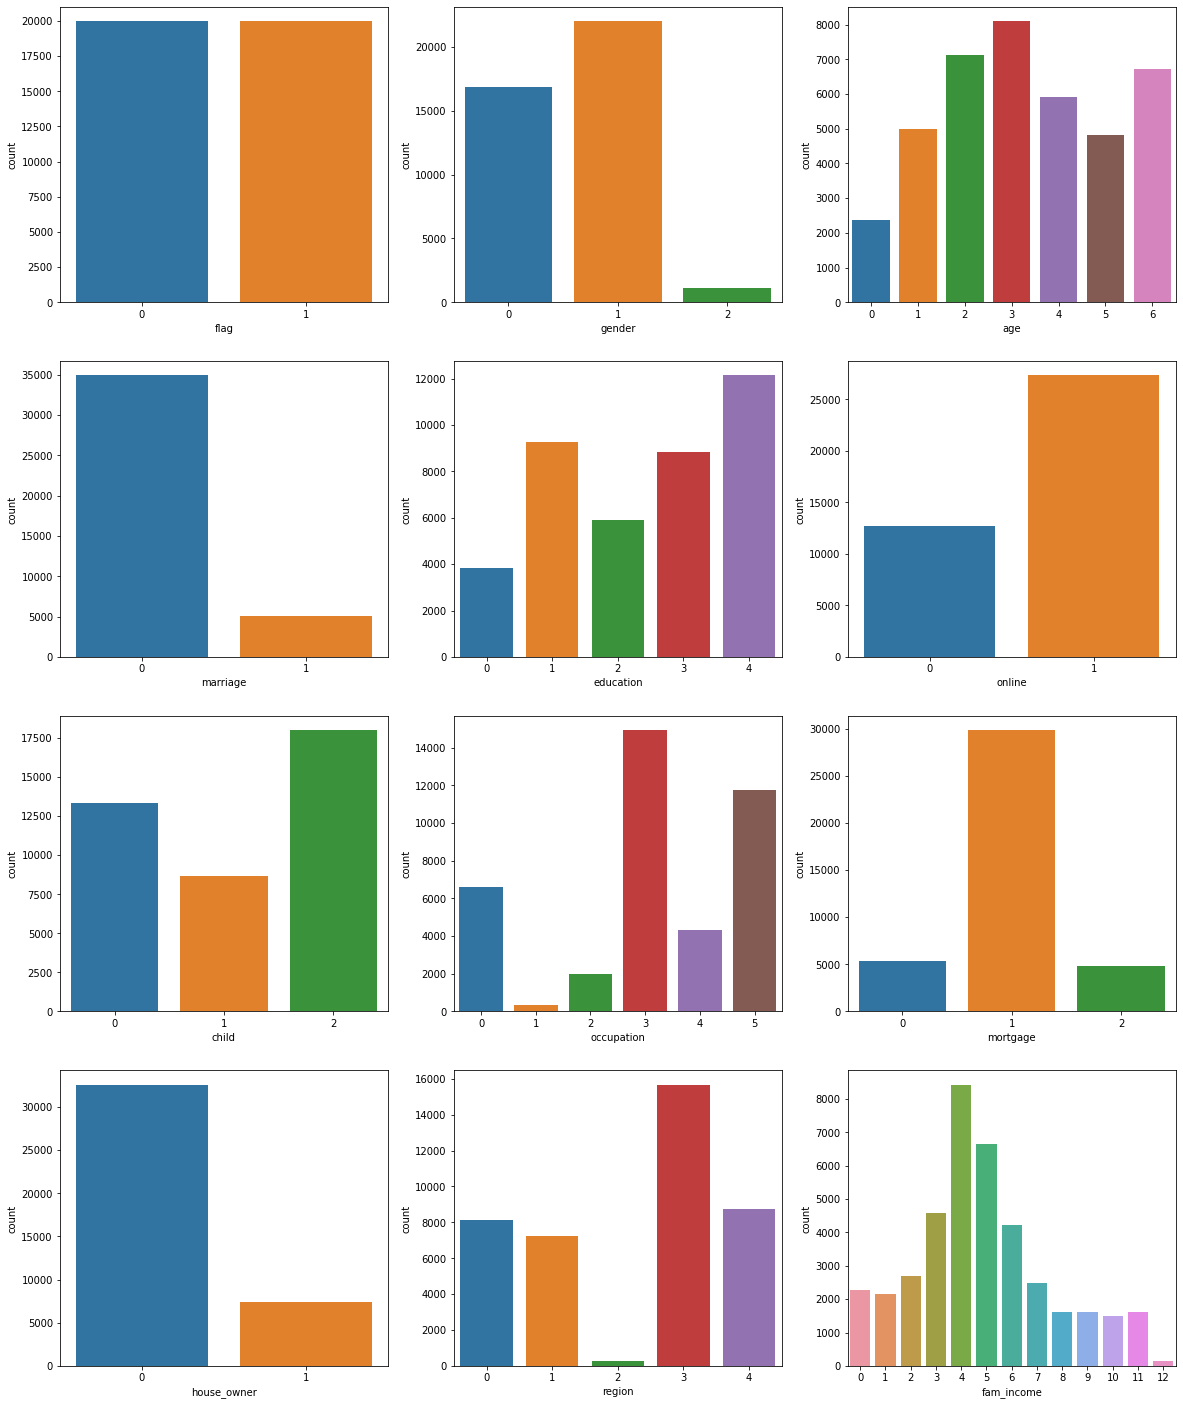

In [44]:
# Univariate Analysis:
fig,ax = plt.subplots(4,3,figsize=(20,25))
sns.countplot(x='flag', data = df, ax=ax[0][0])
sns.countplot(x='gender', data = df, ax=ax[0][1])
sns.countplot(x='age', data = df, ax=ax[0][2])
sns.countplot(x='marriage', data = df, ax=ax[1][0])
sns.countplot(x='education', data = df, ax=ax[1][1])
sns.countplot(x='online', data = df, ax=ax[1][2])
sns.countplot(x='child', data = df, ax=ax[2][0])
sns.countplot(x='occupation', data = df, ax=ax[2][1])
sns.countplot(x='mortgage', data = df, ax=ax[2][2])
sns.countplot(x='house_owner', data = df, ax=ax[3][0])
sns.countplot(x='region', data = df, ax=ax[3][1])
sns.countplot(x='fam_income', data = df, ax=ax[3][2])

Analyzing the Target column

In [45]:
df.flag.value_counts()

1    20000
0    20000
Name: flag, dtype: int64

<Axes: ylabel='flag'>

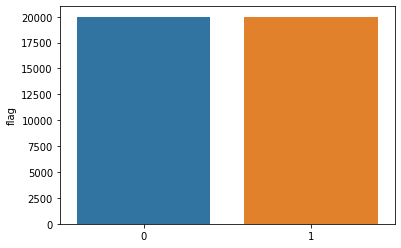

In [46]:
sns.barplot(x=df['flag'].value_counts().index, y=df['flag'].value_counts())

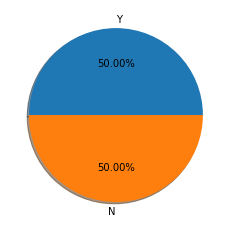

In [47]:
labels = 'Y', 'N'
fig, ax = plt.subplots()
ax.pie(df.flag.value_counts(),labels = labels, autopct = '%1.2f%%', shadow=True)
plt.show()

Target column (flag) has equal values for yes and no i.e, 20000

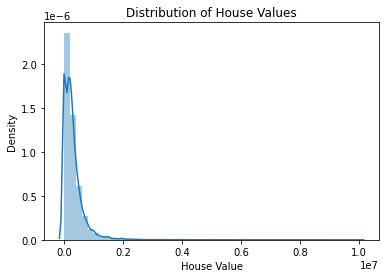

In [48]:
sns.distplot(df['house_val'])

# set the title and labels
plt.title("Distribution of House Values")
plt.xlabel("House Value")
plt.ylabel("Density")

# display the plot
plt.show()

data is left skewed

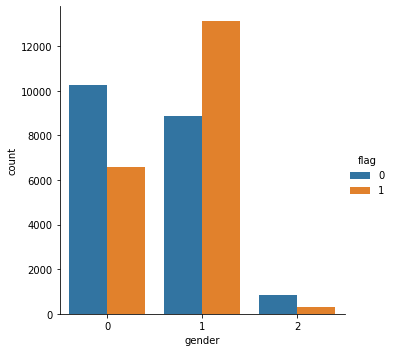

In [49]:
sns.catplot(x='gender',kind='count',data=df,hue='flag',palette='tab10')
plt.show()

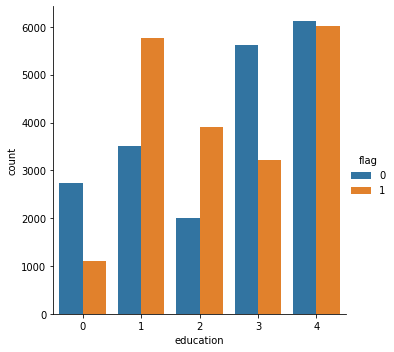

In [50]:
sns.catplot(x='education',kind='count',data=df,hue='flag',palette='tab10')
plt.show()

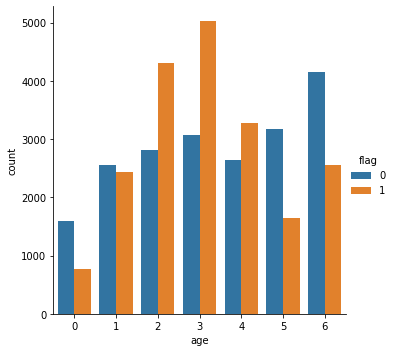

In [51]:
sns.catplot(x='age',kind='count',data=df,hue='flag',palette='tab10')
plt.show()

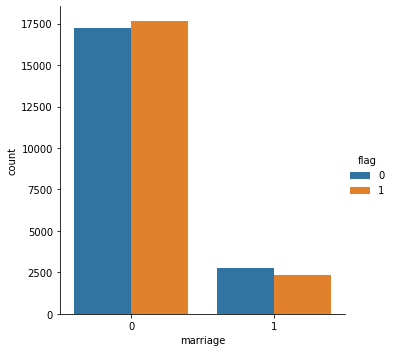

In [52]:
sns.catplot(x='marriage',kind='count',data=df,hue='flag',palette='tab10')
plt.show()

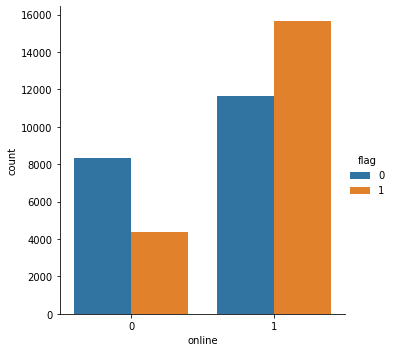

In [53]:
sns.catplot(x='online',kind='count',data=df,hue='flag',palette='tab10')
plt.show()

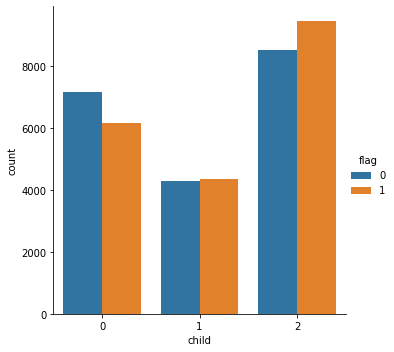

In [54]:
sns.catplot(x='child',kind='count',data=df,hue='flag',palette='tab10')
plt.show()

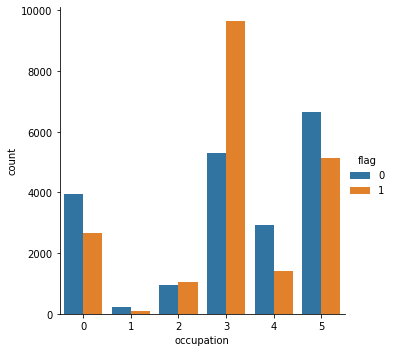

In [55]:
sns.catplot(x='occupation',kind='count',data=df,hue='flag',palette='tab10')
plt.show()

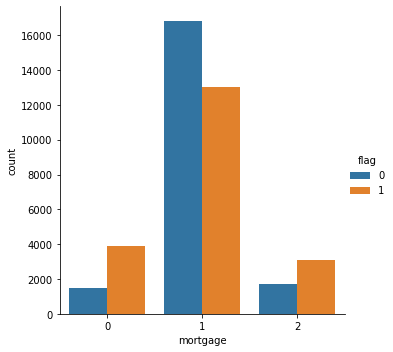

In [56]:
sns.catplot(x='mortgage',kind='count',data=df,hue='flag',palette='tab10')
plt.show()

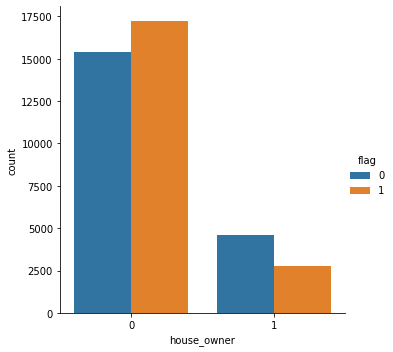

In [57]:
sns.catplot(x='house_owner',kind='count',data=df,hue='flag',palette='tab10')
plt.show()

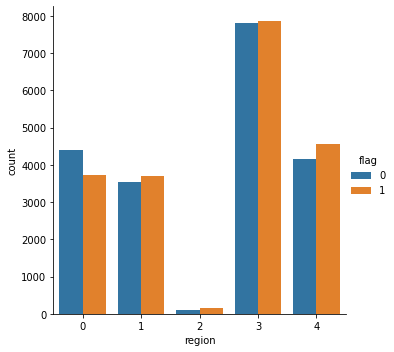

In [58]:
sns.catplot(x='region',kind='count',data=df,hue='flag',palette='tab10')
plt.show()

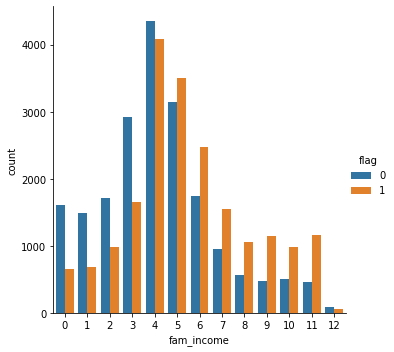

In [59]:
sns.catplot(x='fam_income',kind='count',data=df,hue='flag',palette='tab10')
plt.show()

Bivariate Analysis

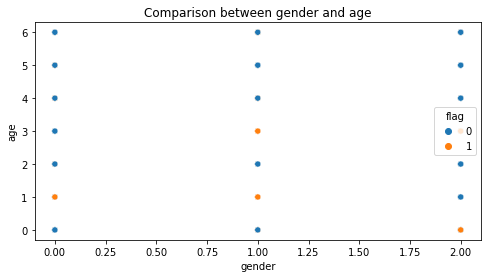

In [60]:
# Checking the relation between two variables
plt.figure(figsize=[8,4])
plt.title('Comparison between gender and age')
sns.scatterplot(x=df['gender'], y=df['age'], hue=df['flag'])
plt.show()


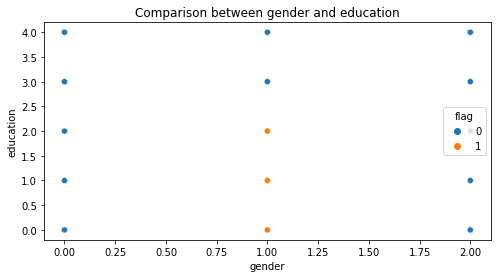

In [61]:
# Checking the relation between two variables
plt.figure(figsize=[8,4])
plt.title('Comparison between gender and education')
sns.scatterplot(x=df['gender'], y=df['education'], hue=df['flag'])
plt.show()


<Axes: title={'center': 'Comparision between age and online'}, xlabel='age', ylabel='online'>

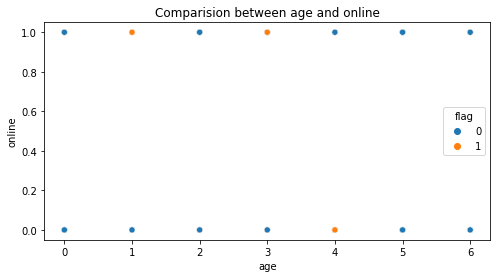

In [62]:
# Checking the relation between two variables
plt.figure(figsize=[8,4])
plt.title('Comparision between age and online')
sns.scatterplot(x=df['age'],y=df['online'],hue=df["flag"])

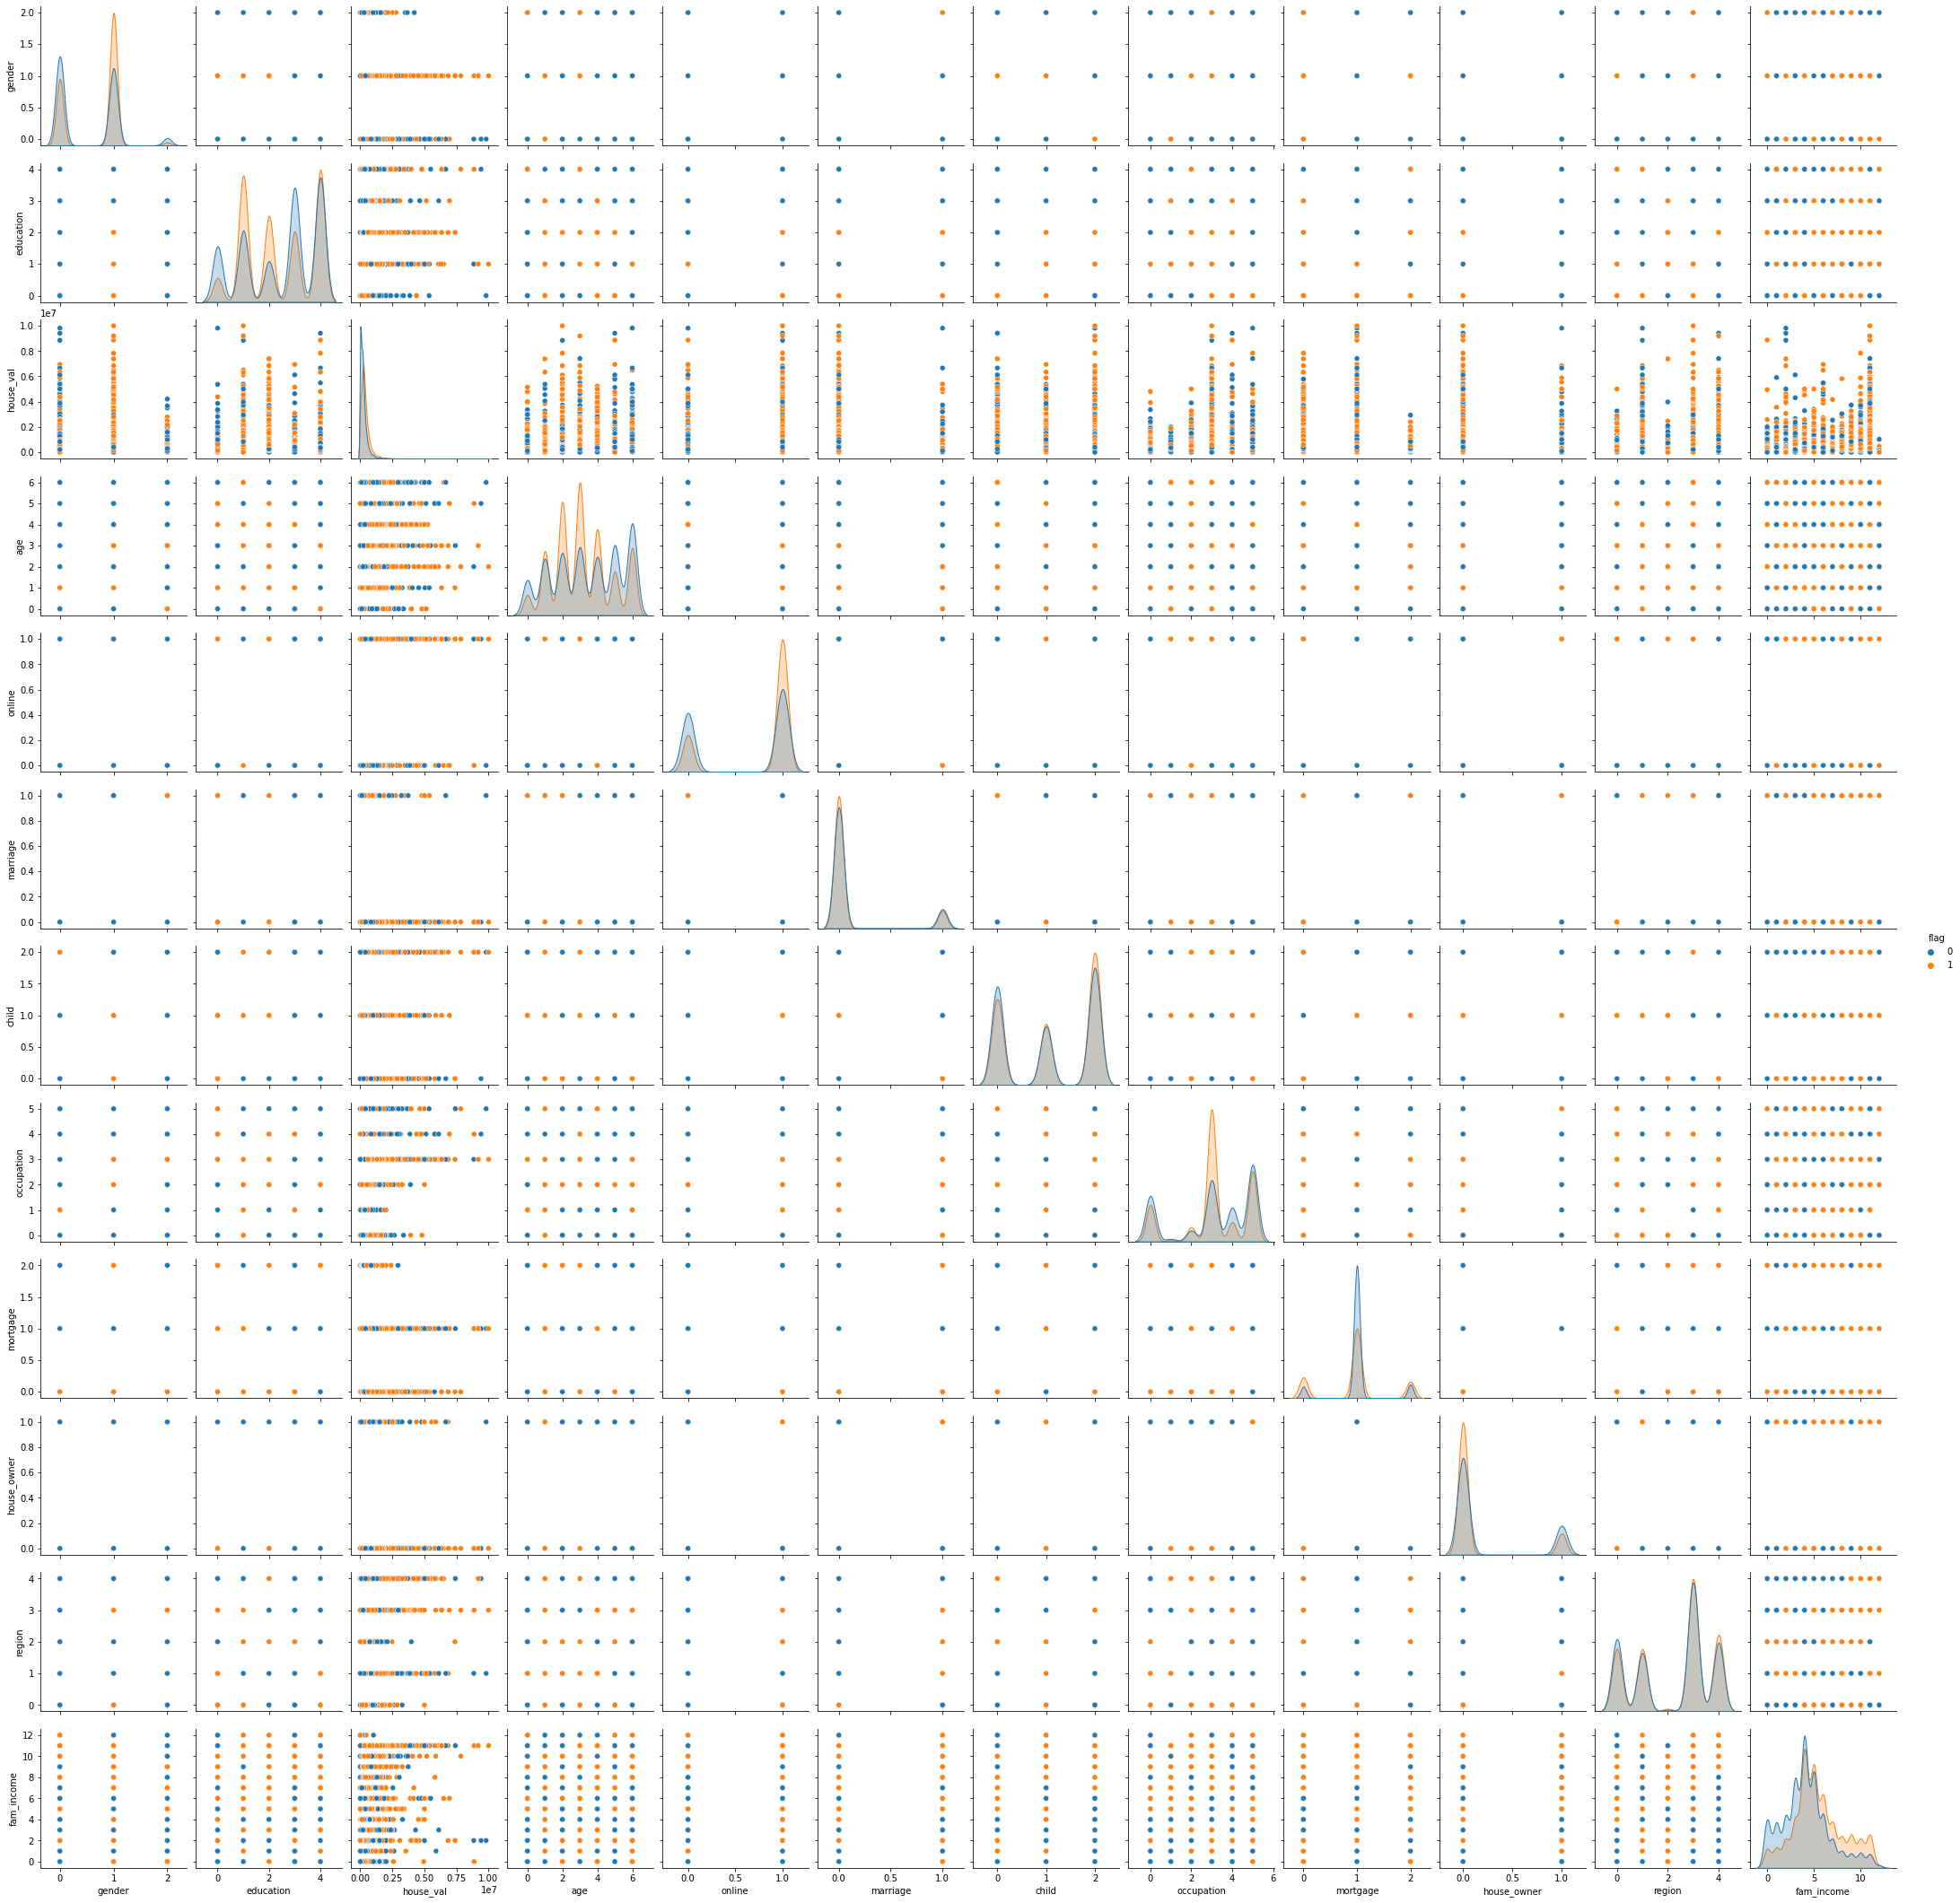

In [63]:
sns.pairplot(df,hue="flag",palette="tab10")
plt.show()

In [64]:
# checking for outliers
X = df.drop(columns = ['flag'])
Y = df['flag']

<Axes: xlabel='house_val'>

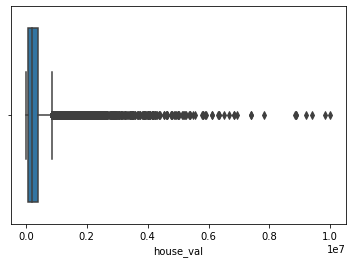

In [65]:
sns.boxplot(x='house_val', data=df)

Outliers are present and data is left skewed

In [66]:
X.skew()

gender         0.100555
education     -0.271686
house_val      6.383172
age            0.005159
online        -0.786482
marriage       2.239829
child         -0.229166
occupation    -0.682122
mortgage      -0.025541
house_owner    1.624451
region        -0.390686
fam_income     0.458267
dtype: float64

In [67]:
df1 = X[['house_val']].copy()

In [68]:
df1

,house_val
0,756460
1,213171
2,111147
3,354151
4,117087
...,...
39995,0
39996,213596
39997,134070
39998,402210


In [69]:
# Feature containing outliers
from scipy.stats import zscore
zscor = zscore(df1)
z_score_abs = np.abs(zscor)

df2 = df1[(z_score_abs < 3).all(axis=1)] 

In [70]:
df2.shape

(39426, 1)

In [71]:
df1.shape

(40000, 1)

In [72]:
# Data loss
loss=(40000-39426)/40000 * 100
loss

1.435

this loss is acceptable

In [73]:
dropindx = X.index.difference(df2.index)
dropindx

Int64Index([    6,   165,   594,   651,   753,   804,   830,   887,  1062,
             1149,
            ...
            38864, 38874, 38947, 38997, 39046, 39107, 39155, 39205, 39393,
            39758],
           dtype='int64', length=574)

In [74]:
df.drop(dropindx,inplace = True)

In [75]:
df.reset_index(drop=True,inplace = True)

In [76]:
df.shape

(39426, 13)

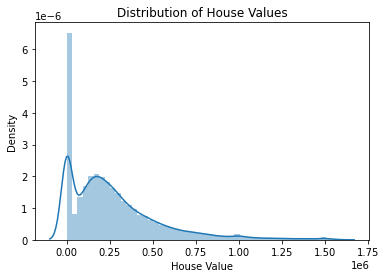

In [77]:
sns.distplot(df['house_val'])

# set the title and labels
plt.title("Distribution of House Values")
plt.xlabel("House Value")
plt.ylabel("Density")

# display the plot
plt.show()

Reducing skewness further using PowerTransformer

In [78]:
from sklearn.preprocessing import PowerTransformer
powtrans= PowerTransformer(method='yeo-johnson', standardize=True)

In [79]:
df3 = X[['house_val']]

In [80]:
transformed= powtrans.fit_transform(df3)
transformed = pd.DataFrame(transformed, columns=df3.columns)

In [81]:
transformed.skew()

house_val   -0.712333
dtype: float64

In [82]:
transformed.index = X.index

In [83]:
df['house_val']= transformed['house_val']

In [84]:
df.skew()

flag           0.011770
gender         0.107389
education     -0.283020
house_val     -0.709847
age            0.006739
online        -0.776942
marriage       2.226870
child         -0.229007
occupation    -0.679261
mortgage      -0.015070
house_owner    1.613205
region        -0.385441
fam_income     0.451226
dtype: float64

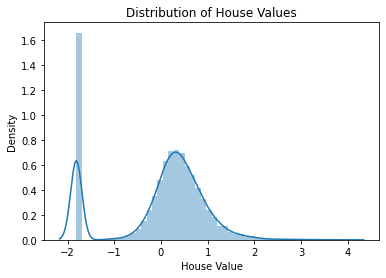

In [85]:
sns.distplot(df['house_val'])

# set the title and labels
plt.title("Distribution of House Values")
plt.xlabel("House Value")
plt.ylabel("Density")

# display the plot
plt.show()

In [86]:
df.head(50)

,flag,gender,education,house_val,age,online,marriage,child,occupation,mortgage,house_owner,region,fam_income
0,1,1,2,1.092078,6,0,0,1,3,1,0,0,11
1,0,0,1,0.247520,5,0,0,1,3,1,0,1,6
2,0,1,4,-0.089195,0,1,0,2,3,1,0,0,9
3,1,1,4,0.552830,0,1,1,1,5,1,0,4,11
4,1,0,4,-0.064337,6,1,0,2,5,1,0,3,7
5,1,0,1,0.335969,4,1,0,0,3,2,0,4,6
6,0,0,1,1.959516,3,1,0,2,3,1,0,3,8
7,0,0,3,0.659912,2,1,0,2,0,1,1,4,3
8,1,1,3,0.232884,6,1,0,1,5,1,0,1,6
9,0,1,4,0.318559,5,1,0,2,5,2,0,0,4


In [87]:
cols = ["gender","education", "age", "child", "occupation","mortgage","region","fam_income",'flag','online','marriage','house_owner']

In [88]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
LE=LabelEncoder()
df[cols]= df[cols].apply(LE.fit_transform)

In [89]:
df[cols].head(50)

,gender,education,age,child,occupation,mortgage,region,fam_income,flag,online,marriage,house_owner
0,1,2,6,1,3,1,0,11,1,0,0,0
1,0,1,5,1,3,1,1,6,0,0,0,0
2,1,4,0,2,3,1,0,9,0,1,0,0
3,1,4,0,1,5,1,4,11,1,1,1,0
4,0,4,6,2,5,1,3,7,1,1,0,0
5,0,1,4,0,3,2,4,6,1,1,0,0
6,0,1,3,2,3,1,3,8,0,1,0,0
7,0,3,2,2,0,1,4,3,0,1,0,1
8,1,3,6,1,5,1,1,6,1,1,0,0
9,1,4,5,2,5,2,0,4,0,1,0,0


In [90]:
# col=np.array(['flag','online','marriage','house_owner'])

In [91]:

# enc=OneHotEncoder()

# enc_data=pd.DataFrame(enc.fit_transform(df[['flag','online','marriage','house_owner']]).toarray())
 
# #Merge with main
# df=data.join(enc_data)
 
# print(df)


In [92]:
# df[col].head(50)

In [93]:
# df['gender']=df['gender'].map({'M':1,'F':0,'U':2}).astype(int)
# df['marriage'] = df['marriage'].map({'Single':0,'Married':1}).astype(int)
# df['education'] = df['education'].map({'<HS':0,'HS':1, 'Some College':2, 'Bach':3, 'Grad':4}).astype(int)
# df['age'] = df['age'].map({'Unk':0, '>65':6, '<=25':1, '<=65':5, '<=55':4, '<=45':3, '<=35':2}).astype(int)
# df['online']=df['online'].map({'N':0,'Y':1}).astype(int)
# df['child'] = df['child'].map({'U':0,'Y':1,'N':2}).astype(int)
# df['occupation'] = df['occupation'].map({'Professional':0, 'Sales/Service':1, 'Blue Collar':2, 'Others':3, 'Retired':4, 'Farm':5}).astype(int)
# df['mortgage'] = df['mortgage'].map({'Low':0, 'Med':1, 'High':2}).astype(int)
# df['house_owner'] = df['house_owner'].map({'Owner':0, 'Renter':1}).astype(int)
# df['region'] = df['region'].map({'Midwest':0, 'Northeast':1, 'West':2, 'South':3, 'Rest':4}).astype(int)
# df['fam_income'] = df['fam_income'].map({'L':11, 'G':6, 'J':9, 'H':7, 'C':2, 'I':8, 'D':3, 'E':4, 'A':0, 'F':5 , 'B':1 , 'K':10 , 'U':12 }).astype(int)


In [94]:
# Convert categorical variables to numerical using one-hot encoding
# df = pd.get_dummies(df, columns=['flag'], drop_first=True)


In [95]:
df

,flag,gender,education,house_val,age,online,marriage,child,occupation,mortgage,house_owner,region,fam_income
0,1,1,2,1.092078,6,0,0,1,3,1,0,0,11
1,0,0,1,0.247520,5,0,0,1,3,1,0,1,6
2,0,1,4,-0.089195,0,1,0,2,3,1,0,0,9
3,1,1,4,0.552830,0,1,1,1,5,1,0,4,11
4,1,0,4,-0.064337,6,1,0,2,5,1,0,3,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39421,1,0,1,0.592650,5,1,0,1,4,1,0,3,5
39422,0,0,3,0.346322,2,0,0,1,0,1,0,3,3
39423,1,1,0,-1.814124,1,1,0,1,5,1,0,0,4
39424,0,1,3,0.139674,5,1,0,2,5,1,0,4,1


In [96]:
for col in df.columns:
    print(col, df[col].unique())

flag [1 0]
gender [1 0 2]
education [2 1 4 3 0]
house_val [ 1.09207787  0.24752034 -0.08919489 ...  0.74474826  0.59265039
  0.13967419]
age [6 5 0 4 3 2 1]
online [0 1]
marriage [0 1]
child [1 2 0]
occupation [3 5 0 2 4 1]
mortgage [1 2 0]
house_owner [0 1]
region [0 1 4 3 2]
fam_income [11  6  9  7  8  3  4  2  0  5  1 10 12]


Separating the independent and target variables into x and y

In [97]:
x = df.drop("flag", axis=1)
y = df["flag"]  

In [98]:
x.head()

,gender,education,house_val,age,online,marriage,child,occupation,mortgage,house_owner,region,fam_income
0,1,2,1.092078,6,0,0,1,3,1,0,0,11
1,0,1,0.247520,5,0,0,1,3,1,0,1,6
2,1,4,-0.089195,0,1,0,2,3,1,0,0,9
3,1,4,0.552830,0,1,1,1,5,1,0,4,11
4,0,4,-0.064337,6,1,0,2,5,1,0,3,7


In [99]:
y.value_counts()

0    19829
1    19597
Name: flag, dtype: int64

In [100]:
x.shape, y.shape

((39426, 12), (39426,))

In [101]:
from sklearn.feature_selection import SelectKBest, f_classif

In [102]:
bestfeat = SelectKBest(score_func = f_classif, k = 'all')

In [103]:
fit = bestfeat.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(33,'Score'))

        Feature        Score
11   fam_income  2233.709011
4        online  1880.794868
0        gender   843.052197
9   house_owner   561.234728
3           age   270.047618
6         child   122.113836
8      mortgage    95.963637
10       region    39.265670
5      marriage    30.344891
1     education    28.501129
7    occupation     2.956791
2     house_val     0.085371


In [104]:
x

,gender,education,house_val,age,online,marriage,child,occupation,mortgage,house_owner,region,fam_income
0,1,2,1.092078,6,0,0,1,3,1,0,0,11
1,0,1,0.247520,5,0,0,1,3,1,0,1,6
2,1,4,-0.089195,0,1,0,2,3,1,0,0,9
3,1,4,0.552830,0,1,1,1,5,1,0,4,11
4,0,4,-0.064337,6,1,0,2,5,1,0,3,7
...,...,...,...,...,...,...,...,...,...,...,...,...
39421,0,1,0.592650,5,1,0,1,4,1,0,3,5
39422,0,3,0.346322,2,0,0,1,0,1,0,3,3
39423,1,0,-1.814124,1,1,0,1,5,1,0,0,4
39424,1,3,0.139674,5,1,0,2,5,1,0,4,1


all columns are contributing so lets not drop any column

Scaling data using Min-Max Scaler

In [105]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
x = pd.DataFrame(mms.fit_transform(x), columns=x.columns)

In [106]:
x.head()

,gender,education,house_val,age,online,marriage,child,occupation,mortgage,house_owner,region,fam_income
0,0.5,0.50,0.501386,1.000000,0.0,0.0,0.5,0.6,0.5,0.0,0.00,0.916667
1,0.0,0.25,0.355680,0.833333,0.0,0.0,0.5,0.6,0.5,0.0,0.25,0.500000
2,0.5,1.00,0.297589,0.000000,1.0,0.0,1.0,0.6,0.5,0.0,0.00,0.750000
3,0.5,1.00,0.408353,0.000000,1.0,1.0,0.5,1.0,0.5,0.0,1.00,0.916667
4,0.0,1.00,0.301878,1.000000,1.0,0.0,1.0,1.0,0.5,0.0,0.75,0.583333


Modeling


Finding the best random state

In [107]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    DTC = DecisionTreeClassifier()
    DTC.fit(x_train, y_train)
    pred = DTC.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.6032296246195469  on Random_state  53


In [108]:
# Creating train-test split

In [109]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

We have created new train test split using the random state.

In [110]:
x.shape, y.shape

((39426, 12), (39426,))

In [111]:
x_train.shape,y_train.shape, x_test.shape,y_test.shape

((27598, 12), (27598,), (11828, 12), (11828,))

#### This is a Classification problem since Target column ('flag') has Catergorical type of Data.

In [112]:
#importing necessary libraries.
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Decision Tree Classifier

In [113]:
DTC = DecisionTreeClassifier()
DTC.fit(x_train,y_train)
predDTC = DTC.predict(x_test)

print(accuracy_score(y_test, predDTC))
print(confusion_matrix(y_test, predDTC))
print(classification_report(y_test,predDTC))

0.5992560027054447
[[3551 2375]
 [2365 3537]]
              precision    recall  f1-score   support

           0       0.60      0.60      0.60      5926
           1       0.60      0.60      0.60      5902

    accuracy                           0.60     11828
   macro avg       0.60      0.60      0.60     11828
weighted avg       0.60      0.60      0.60     11828



Here we are getting 60% accuracy using decision tree classifier

Random Forest Classifier

In [114]:
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC = RFC.predict(x_test)

print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test,predRFC))

0.6585221508285425
[[3952 1974]
 [2065 3837]]
              precision    recall  f1-score   support

           0       0.66      0.67      0.66      5926
           1       0.66      0.65      0.66      5902

    accuracy                           0.66     11828
   macro avg       0.66      0.66      0.66     11828
weighted avg       0.66      0.66      0.66     11828



Here we are getting 66% accuracy using Random Forest Classifier.

Support Vector Classifier

In [115]:
svc = SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)

print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test,predsvc))

0.6667230300980723
[[3945 1981]
 [1961 3941]]
              precision    recall  f1-score   support

           0       0.67      0.67      0.67      5926
           1       0.67      0.67      0.67      5902

    accuracy                           0.67     11828
   macro avg       0.67      0.67      0.67     11828
weighted avg       0.67      0.67      0.67     11828



Here we are getting 67% accuracy using Support Vector Machine Classifier.

Logistic Regression

In [116]:
LR=LogisticRegression()
LR.fit(x_train,y_train)
predLR=LR.predict(x_test)

print(accuracy_score(y_test, predLR))
print(confusion_matrix(y_test, predLR))
print(classification_report(y_test,predLR))

0.6314677037538046
[[3727 2199]
 [2160 3742]]
              precision    recall  f1-score   support

           0       0.63      0.63      0.63      5926
           1       0.63      0.63      0.63      5902

    accuracy                           0.63     11828
   macro avg       0.63      0.63      0.63     11828
weighted avg       0.63      0.63      0.63     11828



Here we are getting 63% accuracy using Logistic Regression.

KNN Classifier

In [117]:
knn = KNN()
knn.fit(x_train,y_train)
predknn = knn.predict(x_test)

print(accuracy_score(y_test, predknn))
print(confusion_matrix(y_test, predknn))
print(classification_report(y_test,predknn))

0.6335813324315185
[[3751 2175]
 [2159 3743]]
              precision    recall  f1-score   support

           0       0.63      0.63      0.63      5926
           1       0.63      0.63      0.63      5902

    accuracy                           0.63     11828
   macro avg       0.63      0.63      0.63     11828
weighted avg       0.63      0.63      0.63     11828



Here we are getting 64% accuracy using KNN Classifier.

Gradient Boosting Classifier

In [118]:
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB = GB.predict(x_test)

print(accuracy_score(y_test, predGB))
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test,predGB))

0.685830233344606
[[4080 1846]
 [1870 4032]]
              precision    recall  f1-score   support

           0       0.69      0.69      0.69      5926
           1       0.69      0.68      0.68      5902

    accuracy                           0.69     11828
   macro avg       0.69      0.69      0.69     11828
weighted avg       0.69      0.69      0.69     11828



Here we are getting 69% accuracy using Gradient Boosting Classifier.

AdaBoostClassifier

In [119]:
ABC = AdaBoostClassifier()
ABC.fit(x_train,y_train)
predABC = ABC.predict(x_test)

print(accuracy_score(y_test, predABC))
print(confusion_matrix(y_test, predABC))
print(classification_report(y_test,predABC))

0.678982076428813
[[4046 1880]
 [1917 3985]]
              precision    recall  f1-score   support

           0       0.68      0.68      0.68      5926
           1       0.68      0.68      0.68      5902

    accuracy                           0.68     11828
   macro avg       0.68      0.68      0.68     11828
weighted avg       0.68      0.68      0.68     11828



Here we are getting 69% accuracy using AdaBoostClassifier.

Checking the Cross Validation Score

In [120]:
from sklearn.model_selection import cross_val_score

In [121]:
# cv score for Decision Tree Classifier
print(cross_val_score(DTC,x,y,cv=5).mean())

0.5872774127062061


In [122]:
# cv score for Random Forest Classifier
print(cross_val_score(RFC,x,y,cv=5).mean())

0.6540605241688351


In [123]:
# cv score for Support Vector  Classifier
print(cross_val_score(svc,x,y,cv=5).mean())

0.6703442733653355


In [124]:
# cv score for Logistic Regression 
print(cross_val_score(LR,x,y,cv=5).mean())

0.6366610116802354


In [125]:
# cv score for KNN Classifier
print(cross_val_score(knn,x,y,cv=5).mean())

0.6364580883165323


In [126]:
# cv score for Gradient Boosting Classifier
print(cross_val_score(GB,x,y,cv=5).mean())

0.6856895703534402


In [127]:
# cv score for AdaBoostClassifier
print(cross_val_score(ABC,x,y,cv=5).mean())

0.679475319755469


#### Hyper parameter tuning for best model

In [128]:
# from sklearn.model_selection import GridSearchCV

In [129]:
# # Gradient Boosting Classifier
# parameters = {'n_estimators':[0,200],
#              'criterion':['friedman_mse', 'squared_error'],
#              'max_depth':np.arange(2,50),
#              'max_features':["auto","sqrt","log2"],
#              'max_leaf_nodes':[10,20,30,40]}

In [130]:
# GCV=GridSearchCV(GradientBoostingClassifier(),parameters,cv=5)

In [131]:
# GCV.fit(x_train,y_train)

In [132]:
# GCV.best_params_

In [133]:
Insurance_prediction= GradientBoostingClassifier(criterion ='friedman_mse', max_depth = 5, max_features= 'log2', max_leaf_nodes= 10, n_estimators= 200)
Insurance_prediction.fit(x_train, y_train)
pred = Insurance_prediction.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

68.5661143050389


In [134]:
#Plotting ROC-AUC curve for best model

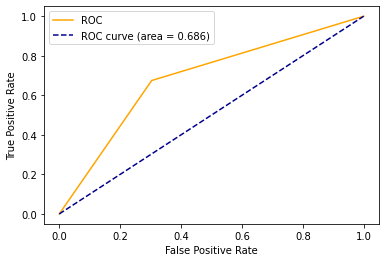

In [135]:
fpr, tpr, threshold = roc_curve(y_test,pred)
auc = roc_auc_score(y_test,pred)
plt.plot(fpr, tpr, color ='orange', label ='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label ='ROC curve (area = %0.3f)'% auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

This is the AUC-ROC curve for the models which is plotted False positive rate against True positive rate.

So the best model has the area under curve as 0.95.

Saving the model

In [153]:
%cd "/content/drive/MyDrive/insurance"

/content/drive/MyDrive/insurance


In [154]:
import joblib

joblib.dump(Insurance_prediction,'insurance.obj')


['insurance.obj']

In [155]:
!ls


insurance.obj  sales_data.csv  testML_.ipynb


In [137]:
ts_model = joblib.load('insurance.obj')

Conclusion

In [138]:
import numpy as np
a = np.array(y_test)
predicted = np.array(Insurance_prediction.predict(x_test))
df_new = pd.DataFrame({"Original":a,"Predicted":predicted},index= range(len(a)))
df_new
     

,Original,Predicted
0,0,1
1,0,1
2,0,0
3,0,0
4,1,1
...,...,...
11823,1,1
11824,0,1
11825,0,0
11826,1,1


In [139]:
#prediction

In [141]:
Prediction_accuracy = pd.DataFrame({'Predictions': ts_model.predict(x_test), 'Actual Values': y_test})
Prediction_accuracy.head(50)

,Predictions,Actual Values
35530,1,0
35425,1,0
29893,0,0
868,0,0
30647,1,1
18535,1,0
1302,0,1
5839,0,0
21507,0,1
3231,1,0


In [142]:
x_test.shape

(11828, 12)

In [143]:
y_test.shape

(11828,)

In [144]:
x_test.shape

(11828, 12)

In [145]:
y_test.shape

(11828,)

In [146]:
#Predicting using the test Dataset

In [147]:
y_pred = ts_model.predict(x_test)

In [148]:
y_pred

array([1, 1, 0, ..., 0, 1, 1])

In [149]:
y_pred.shape

(11828,)